## Lets start with importing the neccessary libaries and neccessary functions

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

 This function is used for computing mean_sqaured_error for provided weights and Biases.<br>
 ```python
loss function :
y_=(m*x)+b
mean_squared_loss = (1/N)((y-y_))**2
```

In [2]:

def compute_error(data,m,b):
        total_error=0
        N=float(len(data))
        for i in range(len(data)):
                [x,y]=data[i]
                y_ = (m * x ) + b
                total_error += (y-y_)** 2
        return ((1/N)*total_error) 


`step_gradient_descent` performs gradient-descent operation that is finding partial deriavatives of weights m and bias b.<br>

```python
partial deriatives of loss function with respect to weight m and bias b :
w_ = -(2/N)(x*(y-(m*x+b))) 
b_ = -(2/N)(y-(m*x+b))
```

In [15]:

def step_gradient_descent(data,m,b,learning_rate=0.0001):
        b_gradient= m_gradient = 0
        N=float(len(data))
        for i in range(len(data)):
                [x,y]=data[i]
                y_=(m*x)+b
                m_gradient+= - (2/N)*(x*(y-y_))
                b_gradient+= -(2/N)*(y-y_)
        #print("m ={}, b ={}".format(m_gradient,b_gradient))
        m_new = m-(learning_rate*m_gradient)
        b_new = b-(learning_rate*b_gradient)
        return (m_new,b_new)

`plot()` is utility function that lets visualize the X ,Y plots and also plot the `line-of-best-fit`

In [16]:
def plot(data,m , b):
        x=np.array(data[:,0])
        y=np.array(data[:,1])
        m=float(format(m,'.4g')[:3])
        b=float(format(b,'.4g')[:3])
        #print(format(m,'.2g'),float(format(b,'.4g')[:4]))
        #print(m,b)
        y_=[ b+(m*y_s) for y_s in y]
        y_ = (m*x)+b
        #print(y_)
        fig=plt.figure()
        ax=fig.add_subplot(111)
        #print(data[0],data[1])
        #print(data[:,0],data[:,1])
        ax.scatter(x,y,c='red')
        ax.plot(x,y_)
        plt.show()

let's the run the `batch-gradient-descent-runner` so that we can perform step-gradient-descent on very points in Data for `1000 epochs` and `learning_rate of 0.001`

Running
Error @ inital stage : 5565.107834483212
Running 0/1000
Running 100/1000
Running 200/1000
Running 300/1000
Running 400/1000
Running 500/1000
Running 600/1000
Running 700/1000
Running 800/1000
Running 900/1000


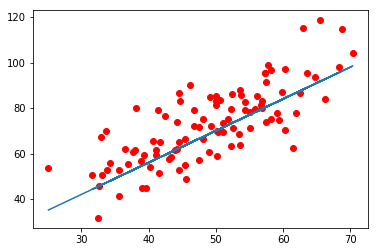

Error after Performing Gradient Descent : 112.61481011613475


In [17]:

def perform_gradient_descent(data,m,b,epochs=1000):
        m_array=b_array=[]
        for i in range(epochs):
                if(i % 100 == 0 ):
                        print("Running {}/{}".format(i,epochs))
                (m,b) = step_gradient_descent(data,m,b)
                m_array.append(m)
                b_array.append(b)
        #np.array(m_array),np.array(b_array)

        plot(data,m,b)

        return (m,b)
                
def run():
        print('Running')
        data = genfromtxt('data.csv',delimiter=',')
        initial_m = 0
        initial_b = 0
        error=compute_error(data,initial_m,initial_b)
        print("Error @ inital stage : {}".format(error))
        (m,b)=perform_gradient_descent(data,initial_m,initial_b)
        #print('gradient ',m,b)
        error=compute_error(data,m,b)
        print("Error after Performing Gradient Descent : {}".format(error))
        
run()

# Conclusion :
Thanks to the `batch-gradient-descent`,We could see that blue line i.e `line-of-best-fit` covered all the points it could 